# Concentration Analytic Solution

In [9]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np

z = 2
e = 1.60217662E-19
k = 1.38064852E-23
T = 300
Na = 6.02E23
Fa = 96485.3329#Na * e
R = Na * k
coef = z*e/(k*T)
V0 = -coef*0.15
D1 = 1.05
D2 = 0.76
Cb = 1
#d = 1.544E-6
epsilon = 80.9 * 8.85418782E-12
N = 1E3
length = 20 #* k * d
k = np.sqrt(2 * Cb * (z*Fa) ** 2 / (R * T * epsilon))
step = np.float_(length/N)
def analytic_concentration(r0 = 1E-5):
    
    
    def coth(x):
        return 1/np.tanh(x)

    def phi0(xi):
        return 2 * np.log(np.abs(np.tanh(0.5 * (xi-xi_0))))

    def C1(xi):
        return (1 / k) * np.exp( -phi0(xi) ) * ( xi - np.tanh(0.5 * (xi-xi_0)) - np.tanh( xi_0 / 2 ) )

    def C0(xi):
        return Cb * np.exp( -phi0(xi) )

    def Cm0(xi):
        return Cb * np.exp( phi0(xi) )
    def C(xi):
        print("r value: " + str(r))
        return C0(xi) + r * C1(xi)
    
    def plot_concentration(xi, c, c0):
        plt.figure()
        plt.title('Analytic concentration to zero and first order \n in r', fontsize=16, fontweight='bold')
        plt.xlabel(r'$\xi = \kappa x$', fontsize=16)
        plt.ylabel('Molar Concentration ', fontsize=16)
        plt.plot(xi, c0, 'b', ms = 1, label='Zero order concentration')
        plt.plot(xi, c, 'g--', ms = 1, label='First order concentration')
        plt.legend(loc='upper right', shadow=True, fontsize='x-large').get_frame().set_facecolor('#00FFCC')
        plt.subplots_adjust(hspace=0.4)
        
        plt.grid(True, color= '#F2F2F2')
        plt.savefig('concentrations.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
        plt.show()




    xi = np.arange(0, length, step)
    
    

    

    r = - r0

    xi_0 = np.log(np.abs(np.tanh(V0/4)))
    g = np.tanh(xi_0/2)


    c0 = C0(xi)
    c = C(xi)
    cm0 = Cm0(xi)
    
    #plot_concentration(xi, c, c0)
    file = open('../results/cp1r'+str(r0)+'.txt', 'w')
    file2 = open('../results/cp0r'+str(r0)+'.txt', 'w')
    file3 = open('../results/cm0r' + str(r0) + '.txt', 'w')

    for i in range(0, len(xi)):
        file.write(str(xi[i]/k*1E9) + "\t" +  str(c[i]) + "\n")
        file2.write(str(xi[i]/k*1E9) + "\t" +  str(c0[i]) + "\n")
        file3.write(str(xi[i]/k*1E9) + "\t" + str(cm0[i]) + "\n")

    file.close()
    return [xi/k*1E9, c, cm0]

Cp_all = []
Cm_all = []
reactRate = [0, 8E-4, 7E-3]
for i in range(0,len(reactRate)):
    X, Cp, Cm = analytic_concentration(reactRate[i])
    Cp_all.append(Cp)
    Cm_all.append(Cm)



r value: 0
r value: -0.0008
r value: -0.007


# Potential Analytic Solution

r value = 0
r value = -0.0008
r value = -0.007


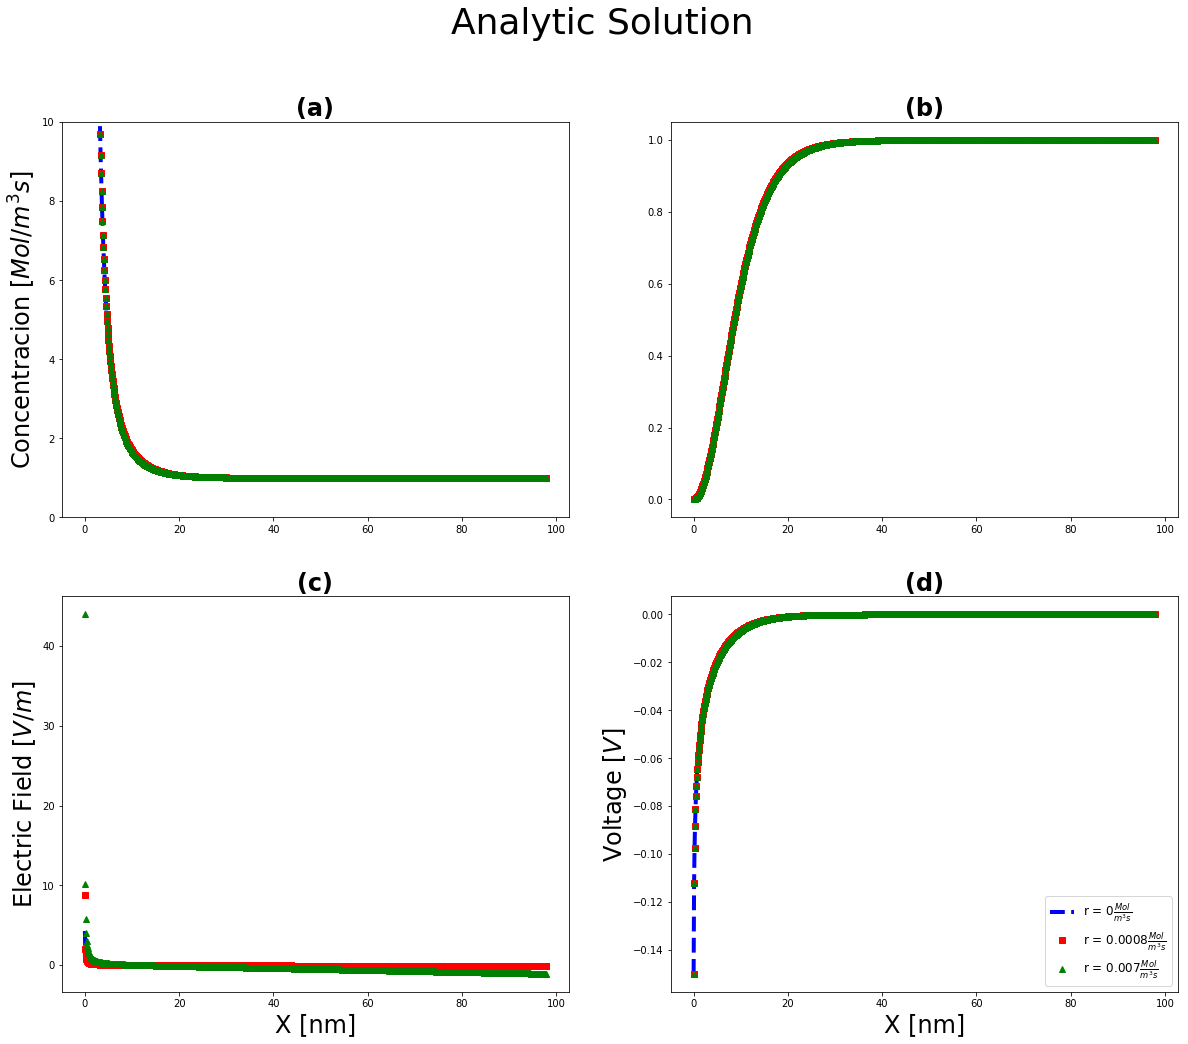

In [10]:
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np


def analytic_potential(r0 = 1e-5):
    def simpson(f, a, b, n = 100):
        h=(b-a)/n
        k=0.0
        x=a + h
        aux = int(n/2)
        for i in range(1,aux + 1):
            k += 4*f(x)
            x += 2*h

        x = a + 2*h
        for i in range(1,aux):
            k += 2*f(x)
            x += 2*h
        return np.array((h/3)*(f(a)+f(b)+k))
    
    def coth(x):
        return 1/np.tanh(x)

    def sech(x):
        return 1/np.cosh(x)



    def phi0(xi):
        return 2 * np.log(np.abs(np.tanh(0.5 * (xi-xi_0))))


    def G(xi):
        return np.log(np.abs(np.cosh(0.5 * (xi-xi_0))))

    def I_G(xi):
        I = simpson(G, xi, xi_d,)
        return I[0]

    def phiprime(xi):
        return xi ** 2 / 2 - 2 * g * xi + 2 * (2 * g - xi ) * coth(0.5*(xi-xi_0))

    def phiprime0(xi):
        return coth( 0.5 * (xi-xi_0) ) * ( sech( 0.5 * (xi-xi_0) ) ) ** 2

    def phi1(xi):
        aRes = []
        c = -phiprime(length)
        A = 2*xi_d/g + 2*g + xi_d ** 2 / 2 - 2 * g * xi_d
        B = (xi_d - 2/g)
        C = -3/2
        D = 2 * (xi_d - 2/g)
        E = -2
        response = A * (xi_d - xi) + B/2 * (xi_d ** 2 - xi **2) + C/3 * (xi_d**3 - xi **3) + D * np.log(np.abs(np.cosh((xi_d-xi_0)/2)/np.abs(np.cosh((xi-xi_0)/2)))) + E * (xi_d * np.log(np.abs(np.cosh((xi_d-xi_0)/2))) - xi * np.log(np.abs(np.cosh((xi-xi_0)/2)))-I_G(xi))
        return response

    def phi(xi):
        print("r value = " + str(r))
        return phi0(xi) + r/k * phi1(xi)

    def Efield(xi):
        return phiprime0(xi) + r * phiprime(xi)
    
    def Efield0(xi):
        return phiprime0(xi)

    def plot_potential(xi, p0, p1):
        plt.figure()
        plt.title('Potential to first order in r', fontsize=16, fontweight='bold')
        plt.xlabel(r'$\xi = \kappa x$', fontsize=16)
        plt.ylabel(r'Dimentionless potential ', fontsize=16)
        plt.plot(xi, p0, 'b', ms = 1, label='Zero order potential')
        plt.plot(xi, p1, 'g--', ms = 1, label='First order potential')

        plt.legend(loc='upper right', shadow=True, fontsize='x-large').get_frame().set_facecolor('#00FFCC')
        plt.subplots_adjust(hspace=0.4)

        plt.grid(True, color= '#F2F2F2')

        ## THIS COMMAND PRINTS THE FIGURE (COMPLETE) TO EPS
        plt.savefig('potentials.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
        ## This command shows the plot.
        plt.show()



    #########################  PLOTTING SCRIPT  ###############################################
    epsilon = 80.9 * 8.85418782E-12
    k = np.sqrt(2 * Cb * (z*Fa) ** 2 / (R * T * epsilon))
    d = 1/k
    r = - r0
    V0 = -coef*0.15

    xi_0 = np.log(np.abs(np.tanh(V0/4)))
    g = coth(xi_0/2)
    xi_d = length
    xi = np.arange(0, length, step)

    p1 = 1/coef * phi(xi)
    p0 = 1/coef * phi0(xi)

    E1 = 1/coef * Efield(xi)
    E0 = 1/coef * Efield0(xi)

    #plot_potential(xi, p0, p1)

    file = open('../results/potential0.txt', 'w')
    file2 = open('../results/E-ana-r' + str(r0) + '.txt', 'w')
    file3 = open('../results/E1-ana-r' + str(r0) + '.txt', 'w')

    for i in range(0, len(xi)):
        file.write(str(xi[i]/k*1E9) + "\t" +  str(p0[i]) + "\n")
        file2.write(str(xi[i]/k*1E9) + "\t" + str(E0[i]) + "\n")
        file3.write(str(xi[i]/k*1E9) + "\t" + str(E1[i]) + "\n")

    file.close()

    file = open('../results/potential1-A'+str(r0)+'.txt', 'w')
    for i in range(0, len(xi)):
        file.write(str(xi[i]/k*1E9) + "\t" +  str(p1[i]) + "\n")

    file.close()
    file2.close()
    file3.close()
    
    return [xi/k*1E9, p1, E1]

Psi_all = []
E_all = []

for i in range(0,len(reactRate)):
    X, aux1, aux2 = analytic_potential(reactRate[i])
    Psi_all.append(aux1)
    E_all.append(aux2)

    
import matplotlib.pyplot as plt  
fs = 24
mw = 6
r0 = reactRate[0]
r1 = reactRate[1]
r2 = reactRate[2]
plt.figure(figsize=(20,16))
plt.suptitle('Analytic Solution', fontsize=fs*1.5)
plt.subplot(2,2,1)
plt.title(r'(a)', fontsize=fs, fontweight='bold')
plt.ylabel(r'Concentracion [$Mol/m^3s$]', fontsize=fs)

plt.plot(X, Cp_all[0], 'b--', linewidth=mw-2, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cp_all[1], 'rs', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cp_all[2], 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')    
plt.ylim(0,10)

plt.subplot(2,2,2)
plt.title(r'(b)', fontsize=fs, fontweight='bold')
plt.plot(X, Cm_all[0], 'b--', linewidth=mw-2, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cm_all[1], 'rs', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Cm_all[2], 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')    

plt.subplot(2,2,3)
plt.title(r'(c)', fontsize=fs, fontweight='bold')
plt.ylabel(r'Electric Field [$V/m$]', fontsize=fs)
plt.plot(X, E_all[0], 'b--', linewidth=mw-2, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[1], 'rs', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, E_all[2], 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')
plt.xlabel('X [nm]', fontsize=fs)
plt.subplot(2,2,4)
plt.title(r'(d)', fontsize=fs, fontweight='bold')
plt.ylabel(r'Voltage [$V$]', fontsize=fs)
plt.plot(X, Psi_all[0], 'b--',linewidth =mw-2, label='r = '+str(r0)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[1], 'rs', markersize=mw, label='r = '+str(r1)+r'$\frac{Mol}{m^3s}$')
plt.plot(X, Psi_all[2], 'g^', markersize=mw, label='r = '+str(r2)+r'$\frac{Mol}{m^3s}$')
plt.xlabel('X [nm]', fontsize = fs)
plt.legend(prop={'size': 12})
plt.savefig('analytic-results.eps', format='eps', dpi=1000, fontsize=fs, fontweight='bold')


plt.show()
